# Project 2: Explore extremums and appearance of multivariate functions 

## 姓名：葉于廷
## 學號：410878048

## 目標：
-  Part.1 多變量函數的介紹

-  Part.2 混合常態參數估計 Normal Mixture

-  Part.3 限制式條件的最大值問題 Constraint optimization

-  Part.4 結語

<hr>

### Part.1 多變量函數的介紹

#### 多變量函數與單變量函數最大不同之處 在於函式的變數增加了

#### 函式展現了更多樣貌 

#### 此一增加會複雜他的計算

#### 更難求出他的極值所在

#### 以下會透過幾種方法的優劣之處

#### 大致可分為計算(Part 2)與畫圖(Part 3)兩部分

In [1]:
from IPython.display import display
from sklearn import mixture
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

### Part.2 混合常態參數估計 Normal Mixture

### 介紹

#### 所謂常態分配之所以叫常態 是因為常出現於日常生活中

#### 但真實的情況裡，更多的情況是更混亂 更難以觀察的

#### 可能是好幾個分配混在一塊 

#### 這時，我們可以用混成的 pdf 來進行估計

#### 先以兩個常態混和的模型來進行說明

#### 為了滿足 pdf 的定義 我們要決定兩個常態的比例

#### $$X_1 \sim N(\mu_1, \sigma^2_1), \;\;\; X_2 \sim N(\mu_2, \sigma^2_2)$$

#### $$f_{Mixed\;Normal}(x) = \pi_1 f_{X_1}(x)+ \pi_2 f_{X_2}(x)$$

#### 如此一來 積分完為 1 且每個 x 對應的 pdf 皆大於 0 

#### 我們如此獲得混和常態分配的 pdf 

<hr>

### 模擬目的

#### 打算要觀察在不同樣本數 [50, 100, 300, 500, 1000, 10000] 底下，估計的狀態怎麼樣

#### 是否樣本數大的情況下 估的會比較準

#### 估計的 pdf 與真實的 pdf 相距很遠嗎

#### 不同參數選定與不同起始點的選擇會如何影響估計結果
<hr>

### 模擬流程

#### 1. 選定兩個常態的平均值與標準差。

#### 2. 選定樣本數的大小後，用  $Binomial \sim (n, \pi_1)$ 決定在不同分配的樣本數。

#### 3. 設定限制式，使用最大概似法和 opt.minimize 做最大值估計

<hr>

Text(0.5, 0.98, 'Mixture Normal distributions')

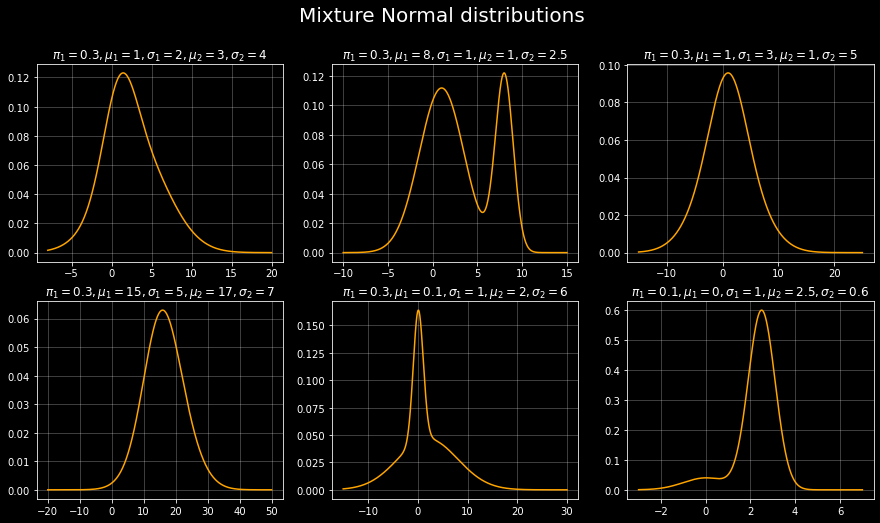

In [2]:
# 設定兩個分布的參數 [pi, mean1, std1, mean2, std2]
one = [0.3, 1, 2, 3, 4]
two = [0.3, 8, 1, 1, 2.5]
three = [0.3, 1, 3, 1, 5]
four = [0.3, 15, 5, 17, 7]
five = [0.3, 0.1, 1, 2, 6]
six = [0.1, 0, 1, 2.5, 0.6]

# begin 估計的起始點位置
begin =  [0.1, 2, 2, 1.5, 1.5]

# 要顯示的範圍
x1bnd = [-8, 20]
x2bnd = [-10, 15]
x3bnd = [-15, 25]
x4bnd = [-20, 50]
x5bnd = [-15, 30]
x6bnd = [-3, 7]

# true mixture normal pdf
plt.style.use('dark_background')
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = [15, 8])


for i in range(6):
    p1, m1, s1, m2, s2 = {1:one, 2:two, 3:three, 4:four, 5:five, 6:six}.get(i + 1, 'Nope')
    lxbnd, uxbnd = {1:x1bnd, 2:x2bnd, 3:x3bnd, 4:x4bnd, 5:x5bnd, 6:x6bnd}.get(i + 1, 'Nope')
    ax = {1:ax1, 2:ax2, 3:ax3, 4:ax4, 5:ax5, 6:ax6}.get(i + 1, 'Nope')
    ax.grid(True, alpha = 0.3)
    x = np.linspace(lxbnd, uxbnd, 10000)
    pdf = p1 * norm.pdf(x, m1, s1) + (1 - p1) * norm.pdf(x, m2, s2)
    ax.plot(x, pdf, color = 'orange')
    ax.set_title(r'$\pi_1 = {}, \mu_1 = {}, \sigma_1 = {}, \mu_2 = {}, \sigma_2 = {}$'.format(p1, m1, s1, m2, s2))
    
plt.suptitle('Mixture Normal distributions', fontsize = 20)
plt.show()

<hr>

### 估計與製圖的函式 - 重點摘要

#### 1. mixnormal：找出兩個常態的參數是什麼，可對不同大小樣本數進行混和常態估計  

#### 可填入 參數值 random_seed 起始值 x座標的範圍

#### 繪畫出實際 pdf 和估計 pdf 在不同樣本數大小的樣貌 順便回傳估計值資料

#### 粉紅實線 - 為真實分配的 pdf

#### 粉紅虛線 - 為組成成分兩個常態分配 pdf

#### 藍色虛線 - 估計參數 所畫出的分配 pdf

#### 黃色虛線 - 為 GussianMixture 所估計分配的 pdf

##### 小缺點 : 如果可知道實際分配可不需在函式中 加 x 座標範圍

#### 2. display_estimation：可展示 資料格 和 畫出資料格裡的值

#### 繪製方式是 以樣本數大小為順序畫出估計參數值的線圖

#### 最後一個是真實值可看離真實值是否接近

#### 繪圖的觀察方式是基於我認為在樣本數越大 應要越靠近實際值

#### 所以每條線的震盪應要越來越平緩

##### 小缺點 : 比例介於 0 ~ 1 震盪幅度小 難以觀察 可能可以做尺度調整或分開畫

In [3]:
def mixnormal(params, seed, x0, xbnd):
    
    # Step 1
    # parameter setting
    p1, m1, s1, m2, s2 = params[0], params[1], params[2], params[3], params[4]
    sample_size = [50, 100, 300, 500, 1000, 10000]
    
    # matrix setting
    k = np.empty([7, 5])
    k[6, :] = [p1, m1, s1, m2, s2]
    
    # subplot setting
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = [15, 8])
    

    for i, n in enumerate(sample_size):
        # Step 2
        # random choose component of mixture
        n1 = np.random.binomial(n, p1)
        n2 = n - n1
        sample = np.r_[norm.rvs(size = n1, loc = m1, scale = s1, random_state = seed), norm.rvs(size = n2, loc = m2, scale = s2, random_state = seed)]
        
        
        # Step 3
        # maximum likelihood
        f = lambda p: -1 * np.sum(np.log(p[0] * norm.pdf(sample, loc = p[1], scale = p[2]) + (1 - p[0]) * norm.pdf(sample, loc = p[3], scale = p[4])))
        
        # estimation
        bnd = [(0, 1), (-np.inf, np.inf), (0.01, np.inf), (-np.inf, np.inf), (0.01, np.inf)]
        opts = dict(disp = True, maxiter = 1e4)
        res = opt.minimize(f, bounds = bnd, tol = 1e-8, x0 = x0, options = opts)
        
        if res.x[0] >= 0.5:
            e1, e2, e3, e4, e5 = 1 - res.x[0], res.x[3], res.x[4], res.x[1], res.x[2]
        else:
            e1, e2, e3, e4, e5 = res.x[0], res.x[1], res.x[2], res.x[3], res.x[4]

        # fill in matrix
        k[i, :] = [e1, e2, e3, e4, e5]
        k[i, :] = np.round(k[i, :], 2)
        
        # Guassian mixture package
        gmm = mixture.GaussianMixture(n_components = 2, covariance_type = 'spherical', tol = 1e-9)
        gmm.fit(sample.reshape(-1, 1))
        gp1 = gmm.weights_[0]
        gm1, gm2 = np.hstack(gmm.means_)
        gs1, gs2 = np.sqrt(gmm.covariances_)
        
        

        # draw on subplots
        x = np.linspace(xbnd[0], xbnd[1], 10000)
        pdf = p1 * norm.pdf(x, m1, s1) + (1 - p1) * norm.pdf(x, m2, s2)
        pdf1 = norm.pdf(x, m1, s1)
        pdf2 = norm.pdf(x, m2, s2)
        gpdf = gp1 * norm.pdf(x, gm1, gs1) + (1 - gp1) * norm.pdf(x, gm2, gs2)
        estpdf = e1 * norm.pdf(x, e2, e3) + (1 - e1) * norm.pdf(x, e4, e5)
        
        ax = {1:ax1, 2:ax2, 3:ax3, 4:ax4, 5:ax5, 6:ax6}.get(i + 1, 'None')
        ax.hist(sample, density = True, edgecolor = 'orange', alpha = 0.5, color = 'lime')
        ax.plot(x, pdf, lw = 3, label = 'True Mixture', color = 'hotpink', alpha=0.9)
        ax.plot(x, estpdf, lw = 3, label = 'Estimate Mixture', color = 'cyan', alpha=0.9, linestyle = '--')
        ax.plot(x, gpdf, lw = 3, label = 'EM', color = 'yellow', alpha = 0.7, linestyle = '-.')
        ax.plot(x, pdf1, x, pdf2, alpha = 0.7, color = 'pink', linestyle = '-')
        ax.set_title("n = {}".format(n))
        # ax.legend(loc = 'upper right')
    plt.legend(loc='center left', bbox_to_anchor=(1, 1))
    plt.suptitle(r'$\pi_1 = {}, \mu_1 = {}, \sigma_1 = {}, \mu_2 = {}, \sigma_2 = {}$'.format(p1, m1, s1, m2, s2), fontsize = 30)
    
    # matrix to dataframe
    estdf = pd.DataFrame(k, columns = ["p1", "m1", "s1", "m2", "s2"])
    estdf['status'] =  [ 'n = {}'.format(j) for j in sample_size] + ['real_parameter']
    estdf.set_index('status', inplace = True)
    
    return(estdf.T)

def display_estimation(df):
    display(df)
    colors = ["lawngreen", "deepskyblue", "yellow", "pink", "orange", "red"]
    df.T.plot(figsize=(10, 8), lw = 3, marker = 'o', fontsize = 11, color = colors)
    # df.iloc[:, 0:5].T.plot(figsize=(10, 8), lw = 3, marker = 'o', fontsize = 11, color = colors)
    # [plt.axhline(y = p, color = colors[i], alpha = 0.6) for i, p in enumerate(df['real_parameter'])]
    plt.xlabel('status', fontsize = 15)
    plt.ylabel('value', fontsize = 15)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.8), fontsize=16)
    plt.title('Estimation under dif. sample size', fontsize = 25)
    

### 技巧使用、函式設定

#### 為了避免算出來的結果等價但值不同 我們做大於0.5就調換估計結果的動作。
#### np.r_ 可合併兩個 np.array
#### tol - 函數值最小可使演算法停止容忍值 
#### maxfun - 函式計算最多次數
#### maxiter - 函式可重複的次數 但因有些iteration中會使用兩三次參數 因此 maxiter > maxfun

<hr>

### Guassian Mixture

#### 此為 python 他人已寫好的套件

#### 顧名思義即是要估計混和常態的套件

#### 過程中要使用 EM 演算法 (Expectation-maximization algorithm)

#### EM 演算法被用於 找到遺失的資料或潛藏的變數(像這題)

#### 在給定初始化參數後 進入迴圈中不斷進行 E step 和 M step 直到參數收斂或迴圈次數跑完

#### E step: 寫成條件期望的函數 條件是給定的樣本

#### M step: 最大化期望函數 改變估計參數

#### 可計算出 local extremum 找到分布參數

#### 在下方的例子中 看的到它的厲害之處 能比我們寫的方法獲得更穩定的結果。
<hr>

### <a id='category'> 型態討論 </a> (可點擊前往)
#### [與起始點相同](#one)
#### [雙峰型態](#two)
#### [尺度改變](#three)
#### [離起始值很遠](#four)
#### [雙峰融合](#five)
#### [比例懸殊](#six)


<hr>

### <a id='one'> 第一組 與起始點相同 </a>

#### 將起始點設定與期望估計到的值一樣

#### 驚訝的是 他並沒有一開始就貼近真實值 而是在 n  = 10000 才相當接近  

#### 可能原因是

#### 在 n = 50 時，從 histogram 沒有貼近真實分布的線 都不像了更別提估到真實分布

#### 可連結到 <font color = 'orange'>要生成這樣的分配是需要的到一定的樣本數 </font>

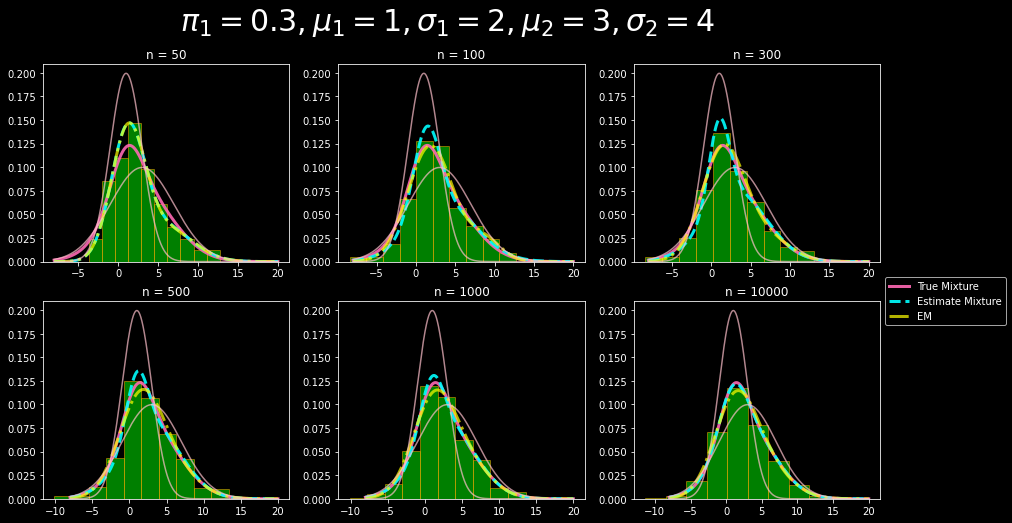

In [4]:
mix1 = mixnormal(one, x0 = one, seed = 5, xbnd = x1bnd)

#### 沒有太大震盪的線表示設定起始點為終點估計結果相當穩定 是可想而知的成果
#### 最後的結果也相當靠近實際值

status,n = 50,n = 100,n = 300,n = 500,n = 1000,n = 10000,real_parameter
p1,0.31,0.39,0.29,0.24,0.24,0.28,0.3
m1,5.80,1.34,0.99,1.01,0.91,0.90,1.0
s1,3.43,1.69,1.29,1.43,1.58,1.99,2.0
m2,1.20,3.57,3.14,3.00,2.90,2.98,3.0
s2,2.08,4.14,3.91,3.93,3.91,3.96,4.0


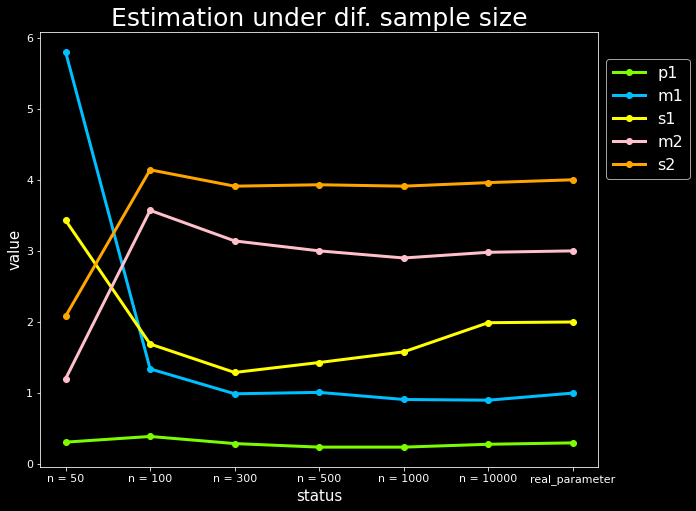

In [5]:
display_estimation(mix1)

#### [back](#category)
<hr>


### <a id='two'> 第二組 雙峰型態 </a>

#### 離彼此分配有點距離且尺度相異的常態

#### n = 300 估的比 n = 500 還要像 但 n 變大時 並未貼近

#### <font color = 'orange'> 代表不是 n 越大保證一定估的越好</font>

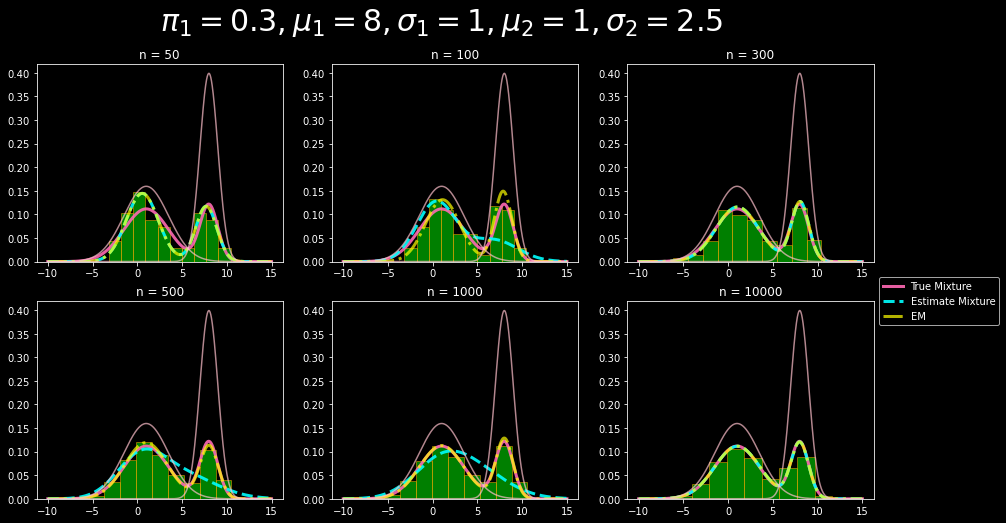

In [6]:
mix2 = mixnormal(two, x0 = begin, seed = 5, xbnd = x2bnd)

### 最後的確有在 n = 10000 估計出理想的結果

status,n = 50,n = 100,n = 300,n = 500,n = 1000,n = 10000,real_parameter
p1,0.35,0.31,0.31,0.43,0.48,0.29,0.3
m1,7.70,6.77,8.05,5.31,4.86,8.00,8.0
s1,1.19,2.70,0.98,3.62,3.59,0.99,1.0
m2,0.55,0.39,1.04,0.39,0.82,1.03,1.0
s2,1.80,2.19,2.38,2.69,3.09,2.53,2.5


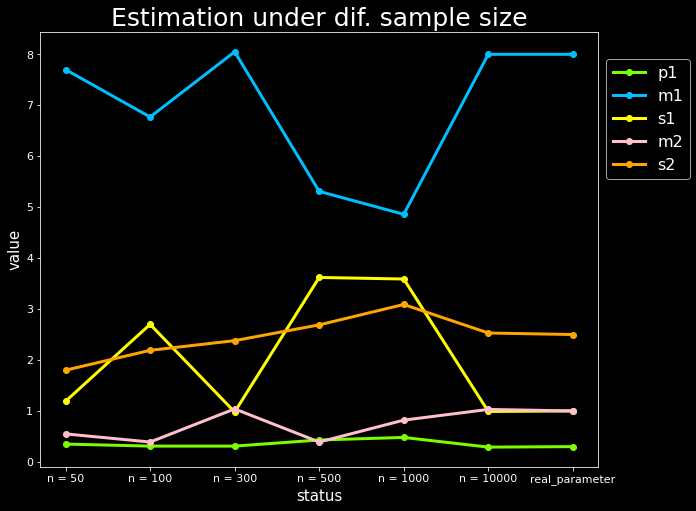

In [7]:
display_estimation(mix2)

#### [back](#category)
<hr>


### <a id='three'> 第三組 尺度改變 </a>

#### 相同平均但尺度相異的常態

#### 樣本數小時雖有偏離平均 在 n 很大時 期望值會因大數法則 應該靠近期望值



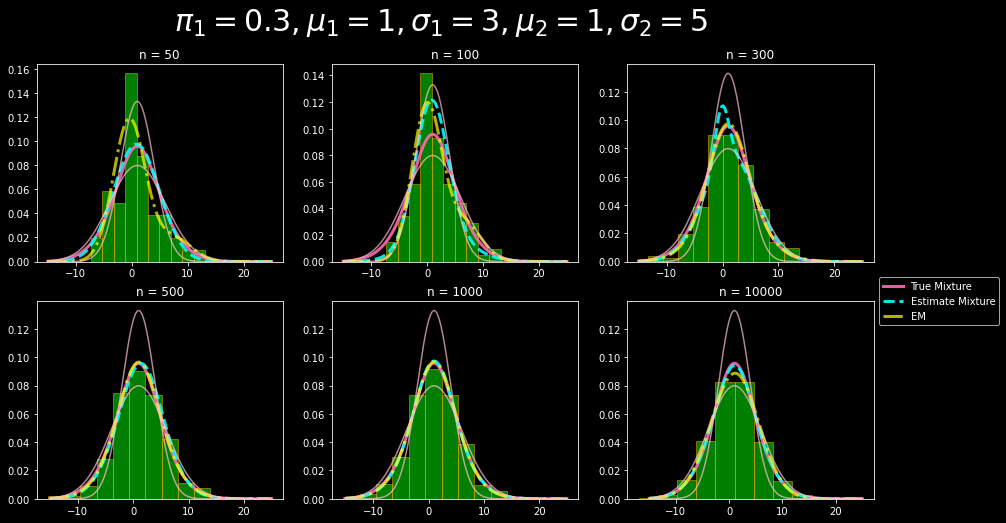

In [8]:
mix3 = mixnormal(three, x0 = begin, seed = 5, xbnd = x3bnd)


#### 在 n = 1000 時 已相當貼近真實值

status,n = 50,n = 100,n = 300,n = 500,n = 1000,n = 10000,real_parameter
p1,0.00,0.24,0.11,0.31,0.37,0.22,0.3
m1,2.10,2.41,-0.13,1.63,0.99,1.09,1.0
s1,3.84,5.25,1.20,3.31,3.15,2.90,3.0
m2,0.85,0.76,1.39,1.13,1.04,0.97,1.0
s2,4.10,2.92,4.68,4.71,4.98,4.85,5.0


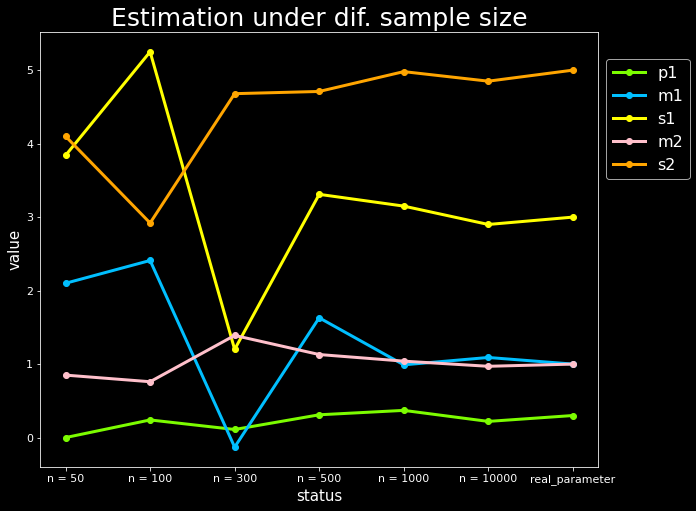

In [9]:
display_estimation(mix3)

[back](#category)
<hr>

### <a id='four'>  第四組 離起始值很遠 </a>

#### 調的離起始值([0.1, 2, 2, 1.5, 1.5])很遠 

#### 圖上看得出有貼近的感覺

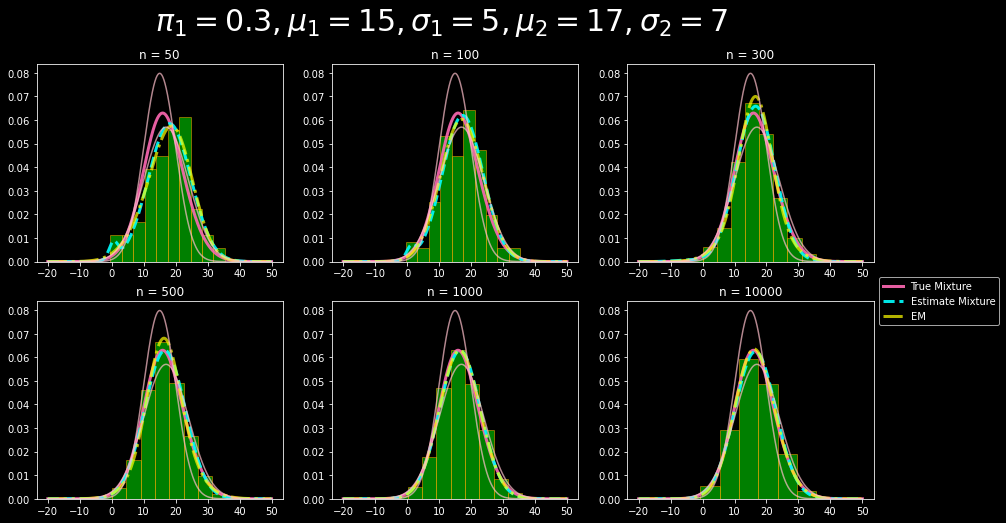

In [10]:
mix4 = mixnormal(four, x0 = begin, seed = 6, xbnd = x4bnd)

#### 有趣的是 估的參數並未全貼近實際參數 甚至比例接近 0

#### 但圖相當貼合 

#### <font color = 'orange'>代表這個混和常態 可能可以用一個常態來代表它 以建立更簡單的假設。</font>

status,n = 50,n = 100,n = 300,n = 500,n = 1000,n = 10000,real_parameter
p1,0.02,0.02,0.01,0.00,0.00,0.00,0.3
m1,0.54,1.18,-4.14,1.51,1.51,1.52,15.0
s1,1.39,1.35,4.79,1.53,1.54,1.54,5.0
m2,18.11,17.39,16.60,16.65,16.55,16.52,17.0
s2,6.66,6.34,6.02,6.35,6.35,6.39,7.0


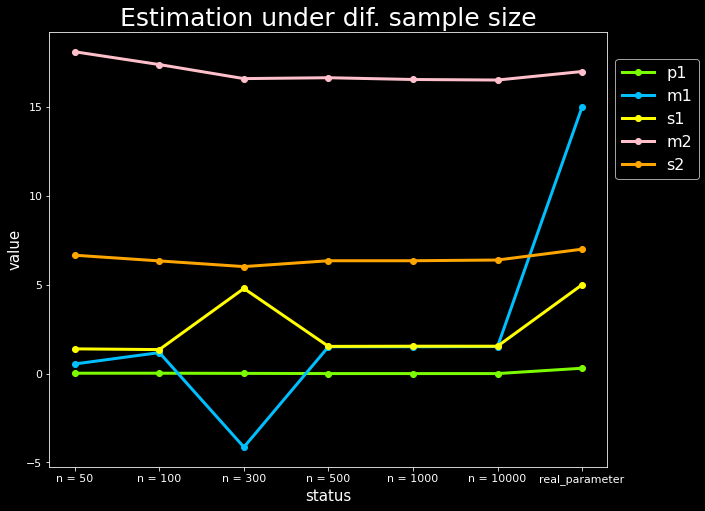

In [11]:
display_estimation(mix4)

#### [back](#category)
<hr>

### <a id='five'>  第五組 雙峰融合 </a>

#### 將兩個原是雙峰型態的常態融合 形成特別的樣貌

#### 一樣可以順利估計

#### 題外話 這題範圍如果 x 不拉這麼大觀察像是設定(-15, 20) 會容易觀察 

#### 但會因為抽到的值很大使 histogram 圖的 x 尺度不一樣 可用 xlim 限制 

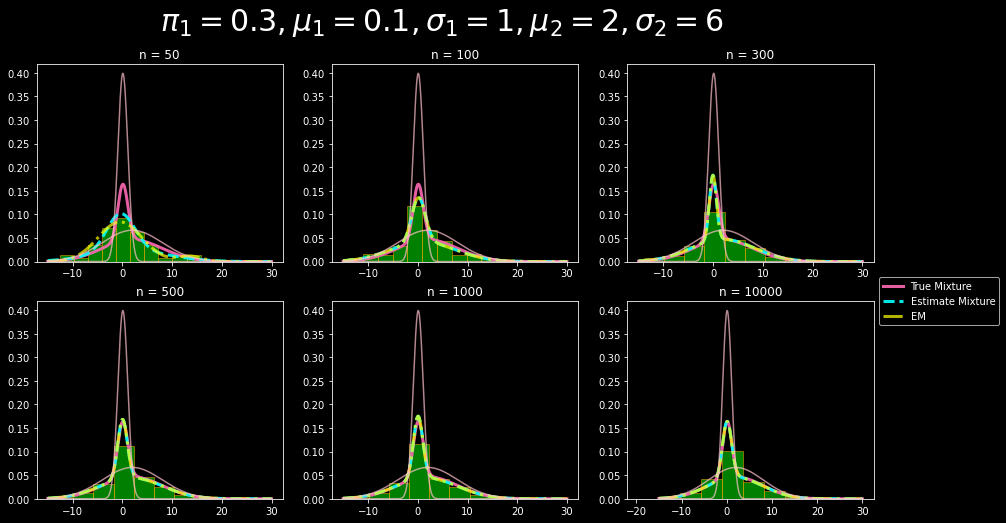

In [12]:
mix5 = mixnormal(five, x0 = begin, seed = 2, xbnd = x5bnd)

#### 本來是認為比雙峰更難辨視 但很快就穩定了

status,n = 50,n = 100,n = 300,n = 500,n = 1000,n = 10000,real_parameter
p1,0.44,0.33,0.25,0.30,0.32,0.31,0.3
m1,1.60,0.15,-0.05,0.03,0.06,0.08,0.1
s1,7.70,1.37,0.71,0.96,0.96,1.03,1.0
m2,-0.34,1.08,1.97,1.82,1.77,1.87,2.0
s2,2.82,6.51,6.37,6.25,6.18,6.05,6.0


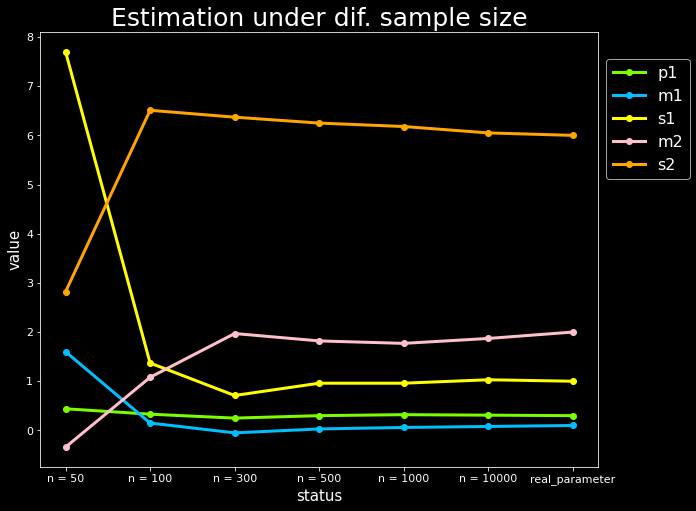

In [13]:
display_estimation(mix5)

#### [back](#category)
<hr>

### <a id='six'>  第六組 比例懸殊 </a>

#### 雙峰融合的樣貌 但因比例懸殊造成比例小的特徵不明顯

#### 在 n = 10000 並未順利估計 再次印證 n 越大 不代表估計越好

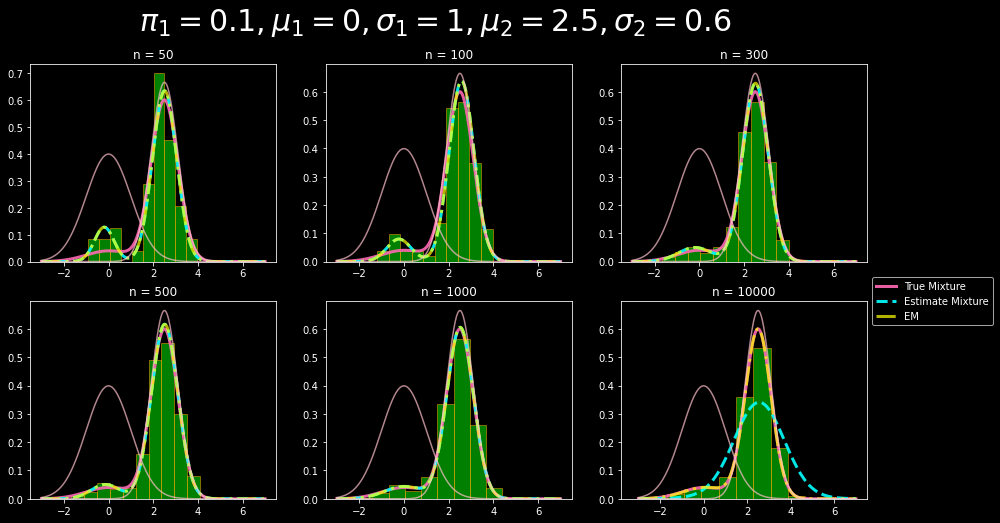

In [14]:
mix6 = mixnormal(six, x0 = begin, seed = 5, xbnd = x6bnd)

#### n = 1000 達到相當靠近的估計

#### n 越大 代表抽 binomial 越靠近期望值

#### 也代表 0.9 的分配可能代替了全部 那可能使用一個常態會更適合點

#### 在做多次的結果下 <font color = 'orange'>太靠近0 或太靠近0.5 沒辦法容易達到良好估計</font> 可能也是一樣的道理 有更好的替代分配

status,n = 50,n = 100,n = 300,n = 500,n = 1000,n = 10000,real_parameter
p1,0.14,0.11,0.09,0.08,0.09,0.05,0.1
m1,-0.19,-0.22,-0.20,-0.14,-0.00,2.03,0.0
s1,0.44,0.54,0.75,0.64,0.86,1.97,1.0
m2,2.51,2.57,2.51,2.51,2.51,2.55,2.5
s2,0.54,0.56,0.57,0.59,0.60,1.15,0.6


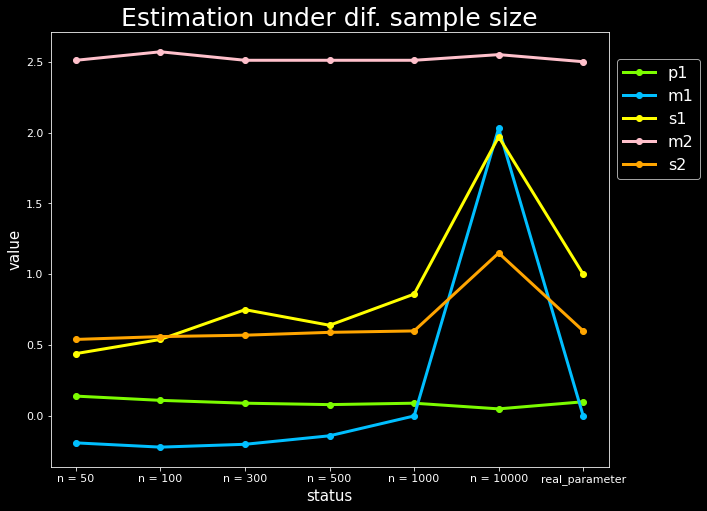

In [15]:
display_estimation(mix6)

#### [back](#category)
<hr>

### 心得

#### 除了起始點值很重要外，要多少樣本數才能夠代表一個 mixture normal 也是重點。

#### n 越大不代表估計表現最佳 但總體觀察是越大越好

#### 比例越小 或越中間 越難以這種方式進行估計 可能是代表性的不足 (證據未呈現在上方 純自己多次模擬的體感)

#### 在估計的時候，同樣 mixture normal 樣貌 可能被當作是別的 mixture normal pdf，因此畫起來會一樣

#### 根據上點我們知道，起始點很重要，如果知道母體參數可能在某一範圍內，可讓估計較少機會去辨識到其他模樣的 pdf
<hr>

## Part.2 限制式條件的最大值問題 Constraint optimization

#### 給予一個資料 觀察最大概似法的值 且畫出等高線圖

#### 其中限制估計的參數範圍 

<hr>

### 資料檢視

#### 檢視 UV.txt 看看資料的樣貌

#### 將 UV 依 U 的大小順序畫圖 

#### 從 scatter plot 來看，U 越大，V 的變異越大 

#### 從 2D histogram 看，大部分資料點集中在左下角，U、V 兩個分布都有右偏的情形。

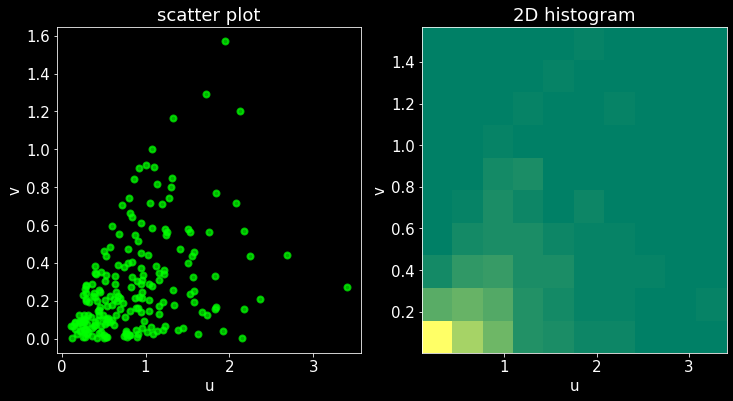

In [47]:
plt.style.use('dark_background')
UV = pd.read_csv('./UV.txt', sep = '\t', names = ['u', 'v'], skiprows = 1)
UV = UV.sort_values(by = ['u'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12, 6])
ax1.scatter(UV.u, UV.v, alpha = 0.7, color = 'lime', lw = 2)
ax1.set_title('scatter plot')
ax1.set_xlabel('u'), ax1.set_ylabel('v')
ax2.hist2d(UV.u, UV.v, cmap ='summer')
ax2.set_xlabel('u'), ax2.set_ylabel('v')
ax2.set_title("2D histogram")
plt.show()

<hr>

### 最大概似函數

#### 認為資料應該服從下面的分配

#### 可設定概似函數為

#### $$ L(\alpha, \beta) = \prod^{n}_{i = 1}f(v_i|\alpha, \beta)F_T(u_i|\alpha, \beta)^{-1}$$

#### $$,\;where\;f_t(v|\alpha, \beta) = \alpha \beta v^{\beta - 1}exp^{-\alpha v^{\beta}}$$
#### $$and\;F_T(u|\alpha, \beta) = 1 - exp^{-\alpha u^{\beta}}$$


#### 想求得這資料最符合的參數($\alpha$, $\beta$) 我們需

#### $$\max_{\alpha,\;\beta\;>\;0} ln L(\alpha, \beta)$$

#### 使這分布最有可能出現這筆資料

#### 其中，我們限制 $\alpha$, $\beta$ 都大於0

<hr>

### 程式重點

#### 先將式子取 log 方便計算 

#### 整理完後 而成$\;\;\Sigma_{i = 1}^{n}log(f_v(v_i|\alpha, \beta)) - log(F_T(u_i|\alpha, \beta))$

#### 乘以負一 可藉由最小值估計找到最大值

#### cons(constrain) 和 bnds(bounds) 兩個都是給限制條件的參數 可選其中之一設定

#### cons = [{'type': 'ineq', 'fun': lambda x:  x[0]}, {'type': 'ineq', 'fun': lambda x:  x[1]}] <br><br> means $x1 >= 0,\;\;\;x2 >= 0$


In [17]:
F = lambda a, b: 1 - np.exp(-a * UV.u ** b)
f = lambda a, b: a * b * (UV.v ** (b - 1)) * np.exp(- a * (UV.v ** b))
lnMLE = lambda ab: -1 * np.sum(np.log(f(ab[0], ab[1])) - np.log(F(ab[0], ab[1])))
opts = dict(disp = True, maxiter=1e4)
bnd = [(0.0001, np.inf), (0.0001, np.inf)]
cons = [{'type': 'ineq', 'fun': lambda x:  x[0]}, {'type': 'ineq', 'fun': lambda x:  x[1]}]
res = opt.minimize(lnMLE, x0=[1, 1], bounds = bnd, options = opts, tol = 1e-8)
a, b, fvalue = [*res.x, res.fun]
display(pd.DataFrame([a, b, fvalue], index = ['alpha', 'beta', 'value'], columns = ['lnMLE']).T)


,alpha,beta,value
lnMLE,1.907349,0.946439,-107.208541


<hr>

### 等高線圖

#### 等高線圖方便我們觀察 local 的最小值附近的狀況

#### meshgrid 可先把對應到圖的 $\alpha$, $\beta$ 以網格狀呈現

#### 以便我們找出圖上的每個最大函數的值

#### 先設定圖上的範圍 再繪出等高線圖

<hr>

### 解讀

#### 每一圈都相同高度

#### $\beta$ 在一附近擁有較大的概似函數值

#### $\alpha = 1.91,\;\;\beta = 0.95$ 有最大的可能性出現這筆資料

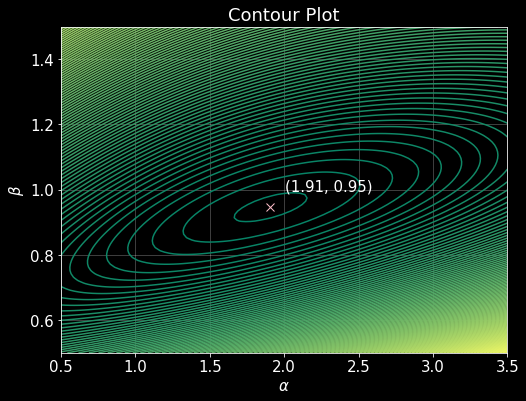

In [48]:
lnMLE = lambda a, b: -1 * np.sum(np.log(f(a, b)) - np.log(F(a, b)))
A = np.linspace(0.5, 3.5, 100)
B = np.linspace(0.5, 1.5, 100)
X, Y = np.meshgrid(A, B) 
vlnMLE = np.vectorize(lnMLE)
Z = vlnMLE(X, Y)
levels = np.arange(-110, 20, 1)
plt.figure(figsize=[8, 6])
plt.contour(X, Y, Z, levels=levels, cmap = plt.cm.summer, inline = 0)
plt.plot(a, b, marker = 'x', color = 'pink', ms = 8)
plt.text(a + 0.1, b + 0.05, '({:.2f}, {:.2f})'.format(a, b))
plt.xlabel(r'$\alpha$'), plt.ylabel(r'$\beta$')
plt.title('Contour Plot')
plt.grid(True, alpha = 0.3)
plt.show()

<hr>

### Surface 圖
#### 左圖有較廣的範圍，右圖拉到近一點觀察
#### 可以看到附近的點較完整的狀態
#### $\alpha$ 固定下 對數概似值隨 $\beta$ 變動 很大
#### 看底下的等高線圖和surface藍色部分 我們知道在 $\beta$ 在 1 附近時 是相當平坦的高度且相對低谷 代表對數概似值很大 解讀成$\beta$ = 1 較有可能出現這種資料。($\alpha$ 變動影響較小)
#### $\beta$ 靠近 0 的時候 函數值急遽上升(從z值可看的出來) 對數概似值相當小(乘以負號) 代表 $\beta$ = 0 是不太可能出現這種資料的


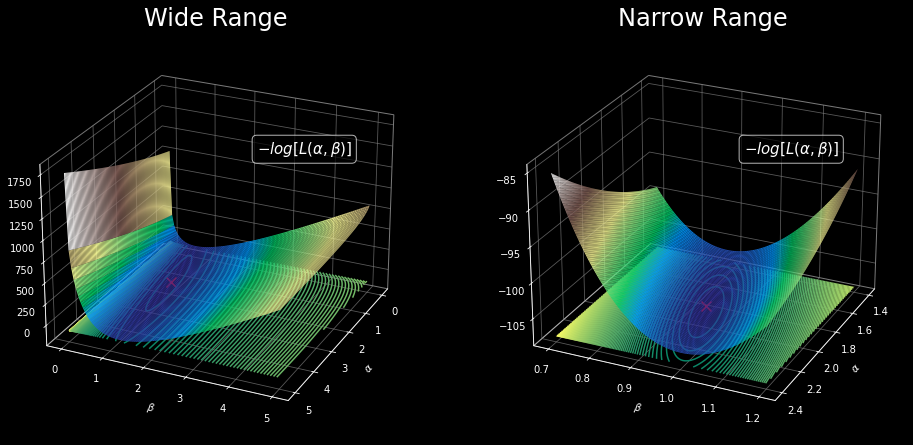

In [19]:
A_whole = np.linspace(0.001, 5, 100)
B_whole = np.linspace(0.001, 5, 100)
A_close = np.linspace(1.4, 2.4, 100)
B_close = np.linspace(0.7, 1.2, 100)
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.7)
fig = plt.figure(figsize = [16, 12])
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

for i in range(2):
    A = {0:A_whole, 1:A_close}.get(i)
    B = {0:B_whole, 1:B_close}.get(i)
    ax = {0:ax1, 1:ax2}.get(i)
    X, Y = np.meshgrid(A, B) 
    vlnMLE = np.vectorize(lnMLE)
    Z = vlnMLE(X, Y)
    plt.rcParams.update({'font.size': 15})
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.terrain, alpha = 0.9)
    ax.contour(X, Y, Z, zdir='z', offset= - 108, levels = 100, cmap=plt.cm.summer, alpha = 1)
    ax.w_xaxis.pane.fill = False
    ax.w_yaxis.pane.fill = False
    ax.w_zaxis.pane.fill = False
    ax.view_init(25, 25)
    props = dict(boxstyle='round', facecolor='black', alpha=0.7)
    ax.text2D(0.6, 0.7, r"$-log[L(\alpha, \beta)]$", fontsize = 15, transform=ax.transAxes, bbox=props)
    ax.set_title('{}'.format(["Wide Range", "Narrow Range"][i]),fontsize=24)
    ax.scatter(a, b, fvalue, marker = 'x', s = 100, color = 'red')
    ax.set_xlabel(r'$\alpha$'), ax.set_ylabel(r"$\beta$")

<hr>

### 心得

#### 1. 概似函數取 log 值 乘負數 可以方便計算最大值，但解釋時要注意我們是要最大值。

#### 2. 概似函數最大值 並不是會出現這筆資料的'機率'最大，而是'可能性'，因為我們是用 pdf 去計算它的。

#### 3. 繪製等高線圖 容易繪製成可觀察樣子 但資訊較 3D surface 少。

#### 4. 繪製 Surface 圖 資訊多 但面對平坦的資料相當難觀察是哪個明確範圍 要不斷調整視角 較不易繪製好觀察的形式



<hr>

### Part.4 結語

#### 一般而言，要怎麼檢視多變量函式

#### 1. 微積分上教的偏微分求極值 可應用於最小平方法 但變數多會使計算量太大

#### 2. 畫圖 看看凹處與凸處分別 在哪些位置 將附近的點一起觀察 但有些函數平坦難以視覺化看出極值的位置所在
#### 3. 利用電腦演算法運算 找到低點或高點附近的值 可容易找到答案 但會受起始點和參數影響 找到其他極小極大值


<hr>

#### 此次專題中

#### 利用 電腦演算法 估計出 mixture normal 的參數，和 maximum likelihood 的參數

#### 畫等高圖 可看得出對數概似函數值最小值出現在最內圈的範圍中

#### 且畫 surface 圖 可看得出對數概似函數值最大值可能出現在$\beta = 1$附近 並且看到附近值對應的函數樣貌

#### 並沒有什麼方法可以最準確的估計，都會受到情況限制

#### 但，每一個方法都提供我們更有力的證據顯示 local extremum 確實就在這裡
